<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [4]:
reviews = df['reviews.text']

## Tokenize Reviews

In [22]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

STOPWORDS = (STOPWORDS).union(['amazon', 'purchase', 'buy'])

def tokenize(text):
    return [token.lower() for token in simple_preprocess(text) if token not in STOPWORDS]

In [23]:
tokenize("Hellow World! Amazon but This is a test!")

['hellow', 'world', 'test']

In [25]:
reviews = reviews.apply(tokenize)

In [26]:
reviews.head()

0    [order, item, bad, quality, missing, backup, s...
1               [bulk, expensive, way, products, like]
2                             [duracell, price, happy]
3              [work, brand, batteries, better, price]
4             [batteries, long, lasting, price, great]
Name: reviews.text, dtype: object

## LDA Topic Modeling

In [27]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
id2word = corpora.Dictionary(reviews)

In [31]:
id2word.filter_extremes(no_below=10, no_above=0.75)

In [32]:
corpus = [id2word.doc2bow(review) for review in reviews]

In [47]:
lda = LdaMulticore(corpus=corpus, 
                   id2word=id2word,
                   num_topics=10, 
                   passes=10,
                   workers=4
                  )

In [48]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [49]:
topics = [' '.join(t) for t in words]

In [50]:
topics

['work like good bought quality battery alexa price basic life',
 'batteries like time working work long far worked store ve',
 'best gift bought christmas happy item loved love purchased tablets',
 'loves tablet old year bought games great use easy son',
 'tablet use easy great good nice size perfect screen love',
 'great price good product batteries value works quality deal work',
 'batteries long battery brand work use good duracell aa time',
 'kids tablet love kindle great price got better case bought',
 'kindle screen light read love new like reading easy reader',
 'tablet apps play books use great games google device screen']

## Visualization

In [51]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [52]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.220087 -0.071854       1        1  15.968743
3     -0.216873  0.018424       2        1  15.785064
9     -0.141566 -0.006015       3        1  11.648086
8     -0.110066 -0.145182       4        1  10.943216
5      0.208000  0.272163       5        1  10.158100
4     -0.121317  0.112183       6        1  10.097751
1      0.191593 -0.134088       7        1   7.059941
7     -0.131802  0.054242       8        1   6.979562
0      0.116195 -0.065964       9        1   5.816925
2     -0.014250 -0.033909      10        1   5.542611, topic_info=     Category         Freq           Term        Total  loglift  logprob
17    Default  7150.000000      batteries  7150.000000  30.0000  30.0000
20    Default  9087.000000          great  9087.000000  29.0000  29.0000
16    Default  4914.000000          price  4914.000000  28.0000  28.0000
1828  Default  6740.000000         tablet  6740.000000  27.0000  27.0000
31    Default  5676.000000           good  5676.000000  26.0000  26.0000
182   Default  2517.000000           kids  2517.000000  25.0000  25.0000
1493  Default  2029.000000          loves  2029.000000  24.0000  24.0000
1624  Default  3073.000000         kindle  3073.000000  23.0000  23.0000
478   Default  2017.000000            old  2017.000000  22.0000  22.0000
676   Default  2828.000000           easy  2828.000000  21.0000  21.0000
782   Default  1170.000000           gift  1170.000000  20.0000  20.0000
98    Default  1682.000000           year  1682.000000  19.0000  19.0000
210   Default  1459.000000           best  1459.000000  18.0000  18.0000
155   Default  2135.000000        product  2135.000000  17.0000  17.0000
83    Default  3479.000000           love  3479.000000  16.0000  16.0000
357   Default  1033.000000          value  1033.000000  15.0000  15.0000
8     Default  2192.000000           work  2192.000000  14.0000  14.0000
1283  Default  1787.000000           apps  1787.000000  13.0000  13.0000
26    Default  3170.000000         bought  3170.000000  12.0000  12.0000
591   Default  1653.000000          games  1653.000000  11.0000  11.0000
87    Default  4365.000000            use  4365.000000  10.0000  10.0000
1367  Default  1648.000000         screen  1648.000000   9.0000   9.0000
22    Default  2392.000000           long  2392.000000   8.0000   8.0000
28    Default   916.000000      christmas   916.000000   7.0000   7.0000
19    Default  1245.000000          brand  1245.000000   6.0000   6.0000
378   Default  1114.000000           play  1114.000000   5.0000   5.0000
89    Default  1509.000000          works  1509.000000   4.0000   4.0000
6     Default  1365.000000        quality  1365.000000   3.0000   3.0000
11    Default  2570.000000           like  2570.000000   2.0000   2.0000
120   Default   954.000000           size   954.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
210   Topic10   813.028442           best  1459.645752   2.3075  -2.9909
795   Topic10   255.443069          loved   434.427460   2.3617  -4.1487
1665  Topic10    55.687740  grandchildren    75.633598   2.5866  -5.6719
1540  Topic10    87.880981           tech   134.745987   2.4653  -5.2157
28    Topic10   415.619934      christmas   916.062988   2.1024  -3.6619
668   Topic10    80.176956      described   124.086746   2.4560  -5.3075
107   Topic10   213.279999           know   441.937561   2.1641  -4.3291
147   Topic10   114.311203           gave   204.397095   2.3116  -4.9528
1616  Topic10   109.201019         mother   199.479141   2.2902  -4.9985
2131  Topic10    43.582363          savvy    59.466354   2.5819  -5.9170
15    Topic10   270.981781          happy   815.842651   1.7905  -4.0896
1886  Topic10    60.846199            law    97.004349   2.4263  -5.5833
1992  Topic10   233.207397        tablets   790.048401   1.6725  -4.2398
713   Topic10    90.1302

## Coherence Values

In [53]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, reviews, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=reviews, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [54]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        reviews=reviews,
                                                        start=2,
                                                        limit=40,
                                                        step=6)

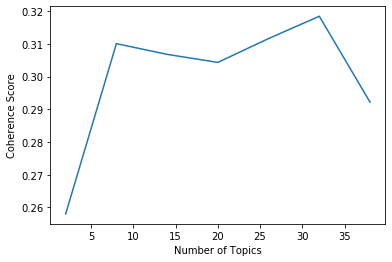

In [56]:
import matplotlib.pyplot as plt

x = range(2,40,6)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling